# Esperienza 1
## Misura della focale di una lente convergente sottile

In [2]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
graph_default_size = (6,3)
graph_default_dpi = 200
graph_base_name = './grafici/graph_'

style = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks'][2]
sns.set_style(style)

In [164]:
style = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks'][2]
sns.set_style(style)

palette = sns.color_palette('Paired')
palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [88]:
pd_data_main = pd.read_csv('data_main.txt', sep='\t', dtype='str,float64,float64', comment='#')

In [89]:
pd_data_main

,obj,val,err
0,d,4.0,0.01
1,D1_D,10.0,0.01
2,D4_D1,2.5,0.01
3,D4_D2,14.0,0.01
4,n_lente,8.0,NaN
5,dr,2.6,0.00
6,vv,10.1,0.00
7,sorgente,223.5,0.25
8,lente,275.0,0.25


In [90]:
def get_main(obj):
    row = pd_data_main.loc[pd_data_main['obj'] == obj]
    return (row.iloc[0,1], row.iloc[0,2], 3*row.iloc[0,2])

In [91]:
# Distanza sorgenti mascherina oggetto dimensionato
d, d_sig, d_Dlt = get_main('d')


# Distanza tra i due fori del diaframma con foro centrale
D1_D, D1_D_sig, D1_D_Dlt = get_main('D1_D')


# Distanza tra i due fori parassiali del diaframma a 4 fori
D4_D1, D4_D1_sig, D4_D1_Dlt = get_main('D4_D1')

# Distanza tra i due fori marginali del diagramma a 4 fori
D4_D2, D4_D2_sig, D4_D2_Dlt = get_main('D4_D2')


# Numero lente
lente_n, _, _ = get_main('n_lente')

# Spessore di montaggio della lente
lente_dr, _, _ = get_main('dr')

# Spessore di montaggio della lente
lente_vv, _, _ = get_main('vv')


# Posizione della sorgente misurata con cavalliere posizionatore
pos_sorgente, pos_sorgente_sig, pos_sorgente_Dlt = get_main('sorgente')

# Posizione della lente
pos_lente, pos_lente_sig, pos_lente_Dlt = get_main('lente')

In [39]:
# Errore posizione dello schermo 
l_sig, l_Dlt = 0.25, 0.75

In [209]:
# Focale a mano
mano = pos_lente - pos_sorgente
mano

51.5

## Bessel

In [17]:
pd_data_bessel = pd.read_csv('data_bessel.txt', sep='\t', dtype='float64,float64,float64,str', comment='#')

In [18]:
pd_data_bessel

,schermo,p1,p2,op
0,55.0,29.00,48.40,fabiana
1,55.0,29.00,48.40,fabiana
2,55.0,28.90,48.30,fabiana
3,55.0,28.90,48.50,fabiana
4,55.0,29.00,48.40,fabiana
...,...,...,...,...
95,100.0,28.05,94.10,lorenzo
96,100.0,28.05,94.15,lorenzo
97,100.0,28.05,94.20,lorenzo
98,100.0,28.00,94.20,lorenzo


In [92]:
ds_bessel = xr.Dataset(
    data_vars=dict(
        p1=(['op', 'l', 'n'], np.stack([
            np.split(pd_data_bessel['p1'].to_numpy(), 20)[1::2],
            np.split(pd_data_bessel['p1'].to_numpy(), 20)[::2]
            ])),
        p2=(['op', 'l', 'n'], np.stack([
            np.split(pd_data_bessel['p2'].to_numpy(), 20)[1::2],
            np.split(pd_data_bessel['p2'].to_numpy(), 20)[::2]
            ]))
    ),
    coords=dict(
        n=('n', range(5)),
        l=('l', pd_data_bessel['schermo'].unique() - pos_sorgente/10),
        op=('op', ['L', 'F'])
    )
)

In [93]:
ds_bessel

<xarray.Dataset>
Dimensions:  (op: 2, l: 10, n: 5)
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * l        (l) float64 32.65 37.65 42.65 47.65 ... 62.65 67.65 72.65 77.65
  * op       (op) <U1 'L' 'F'
Data variables:
    p1       (op, l, n) float64 28.95 29.0 29.0 28.95 ... 28.05 28.05 28.05 28.0
    p2       (op, l, n) float64 48.2 48.3 48.35 48.25 ... 94.05 94.05 94.1 94.1

In [94]:
da_si = ds_bessel.p2 - ds_bessel.p1

In [95]:
da_si

<xarray.DataArray (op: 2, l: 10, n: 5)>
array([[[19.25, 19.3 , 19.35, 19.3 , 19.35],
        [24.9 , 25.  , 24.9 , 24.95, 24.95],
        [30.3 , 30.25, 30.15, 30.2 , 30.2 ],
        [35.5 , 35.55, 35.5 , 35.6 , 35.5 ],
        [40.8 , 40.8 , 40.75, 40.75, 40.7 ],
        [45.8 , 45.9 , 45.9 , 45.85, 45.8 ],
        [51.  , 51.  , 51.  , 51.  , 51.05],
        [56.1 , 56.05, 56.05, 56.05, 56.05],
        [61.2 , 61.15, 61.1 , 61.1 , 61.1 ],
        [66.05, 66.1 , 66.15, 66.2 , 66.1 ]],

       [[19.4 , 19.4 , 19.4 , 19.6 , 19.4 ],
        [25.  , 25.  , 24.8 , 25.  , 24.95],
        [30.25, 30.25, 30.3 , 30.15, 30.3 ],
        [35.45, 35.45, 35.5 , 35.4 , 35.45],
        [40.75, 40.65, 40.7 , 40.75, 40.7 ],
        [45.75, 45.75, 45.7 , 45.8 , 45.75],
        [51.1 , 50.8 , 50.95, 50.9 , 50.85],
        [56.  , 55.9 , 56.1 , 56.  , 56.  ],
        [61.05, 61.  , 61.1 , 61.15, 60.95],
        [66.1 , 66.  , 66.  , 66.05, 66.1 ]]])
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * l        (l) float64 32.65 37.65 42.65 47.65 ... 62.65 67.65 72.65 77.65
  * op       (op) <U1 'L' 'F'

In [96]:
da_s = da_si.mean(dim=['n', 'op'])

In [97]:
da_s

<xarray.DataArray (l: 10)>
array([19.375, 24.945, 30.235, 35.49 , 40.735, 45.8  , 50.965, 56.03 ,
       61.09 , 66.085])
Coordinates:
  * l        (l) float64 32.65 37.65 42.65 47.65 ... 62.65 67.65 72.65 77.65

In [98]:
da_s_sig = (((da_si - da_s) ** 2).mean(dim=['n', 'op'])) ** .5

In [99]:
da_s_sig

<xarray.DataArray (l: 10)>
array([0.09013878, 0.06103278, 0.055     , 0.05385165, 0.045     ,
       0.06324555, 0.08674676, 0.05567764, 0.07      , 0.05937171])
Coordinates:
  * l        (l) float64 32.65 37.65 42.65 47.65 ... 62.65 67.65 72.65 77.65

In [100]:
da_s_Dlt = 3 * da_s_sig

In [101]:
da_fi = (da_s.l**2 - da_s**2) / (4 * da_s.l)

In [102]:
da_fi

<xarray.DataArray (l: 10)>
array([5.28814606, 5.2806738 , 5.30402858, 5.30420986, 5.28339162,
       5.31605594, 5.29765074, 5.31101848, 5.32014591, 5.35188434])
Coordinates:
  * l        (l) float64 32.65 37.65 42.65 47.65 ... 62.65 67.65 72.65 77.65

In [103]:
da_fi_Dlt = l_Dlt*(da_s.l**2 + da_s**2)/(4*da_s.l**2) + da_s_Dlt*(da_s)/(2*da_s.l)

In [104]:
da_fi_Dlt

<xarray.DataArray (l: 10)>
array([0.33376107, 0.33046318, 0.34021374, 0.3516765 , 0.35196237,
       0.38120863, 0.41743152, 0.38529067, 0.40837014, 0.39910117])
Coordinates:
  * l        (l) float64 32.65 37.65 42.65 47.65 ... 62.65 67.65 72.65 77.65

In [105]:
da_fi_w = (da_fi_Dlt/3) ** (-.5)

In [106]:
f_bessel = (da_fi * da_fi_w).sum() / da_fi_w.sum()

In [107]:
f_bessel

<xarray.DataArray ()>
array(5.30519609)

In [108]:
f_sig_bessel = da_fi_w.sum() ** (-.5)

In [109]:
f_sig_bessel

<xarray.DataArray ()>
array(0.18715489)

In [110]:
f_Dlt_bessel = 3 * f_sig_bessel

In [111]:
f_Dlt_bessel

<xarray.DataArray ()>
array(0.56146466)

## Scala

In [112]:
pd_data_scala = pd.read_csv('data_scala.txt', sep='\t', dtype='float64,float64,str', comment='#')

In [113]:
pd_data_scala

,l,s,op
0,0.0,35.00,fabiana
1,0.0,34.80,fabiana
2,0.0,34.80,fabiana
3,0.0,35.00,fabiana
4,0.0,34.50,fabiana
5,0.0,34.50,lorenzo
6,0.0,34.70,lorenzo
7,0.0,34.75,lorenzo
8,0.0,34.75,lorenzo
9,0.0,34.65,lorenzo


In [114]:
ds_scala = xr.Dataset(
    data_vars=dict(
        s=(['op', 'l', 'n'], np.stack([
            np.split(pd_data_scala['s'].to_numpy(), 10)[1::2],
            np.split(pd_data_scala['s'].to_numpy(), 10)[::2]
            ]))
    ),
    coords=dict(
        n=('n', range(5)),
        l=('l', pd_data_scala['l'].unique()),
        op=('op', ['L', 'F'])
    )
)

In [115]:
ds_scala

<xarray.Dataset>
Dimensions:  (op: 2, l: 5, n: 5)
Coordinates:
  * n        (n) int64 0 1 2 3 4
  * l        (l) float64 0.0 10.0 20.0 30.0 40.0
  * op       (op) <U1 'L' 'F'
Data variables:
    s        (op, l, n) float64 34.5 34.7 34.75 34.75 ... 87.5 87.3 87.5 87.3

In [116]:
da_s = ds_scala.s.mean(dim=['op', 'n'])

In [117]:
da_s

<xarray.DataArray 's' (l: 5)>
array([34.745, 47.645, 60.85 , 74.02 , 87.5  ])
Coordinates:
  * l        (l) float64 0.0 10.0 20.0 30.0 40.0

In [118]:
da_s_sig = (((ds_scala.s - da_s)**2).mean(dim=['op', 'n'])) ** .5

In [119]:
da_s_sig

<xarray.DataArray 's' (l: 5)>
array([0.16347783, 0.24026028, 0.15811388, 0.24515301, 0.22248595])
Coordinates:
  * l        (l) float64 0.0 10.0 20.0 30.0 40.0

In [120]:
da_s_Dlt = 3 * da_s_sig

In [121]:
da_s_Dlt

<xarray.DataArray 's' (l: 5)>
array([0.49043348, 0.72078083, 0.47434165, 0.73545904, 0.66745786])
Coordinates:
  * l        (l) float64 0.0 10.0 20.0 30.0 40.0

In [122]:
def fit_pes(X,Y,Ysig):
    Ypes = 1 / Ysig ** 2

    N = X.size
    DELTA = Ypes.sum()*(Ypes*X**2).sum() - (Ypes*X).sum() ** 2

    a = ((Ypes*X**2).sum()*(Ypes*Y).sum() - (Ypes*X).sum()*(Ypes*X*Y).sum()) / DELTA    # q
    b = (Ypes.sum()*(Ypes*X*Y).sum() - (Ypes*X).sum()*(Ypes*Y).sum()) / DELTA           # m
    #
    SIGy = ((((a+b*X)-Y)**2).sum()/ (N-2)) ** .5
    SIGa = SIGy * ((X**2).sum() / DELTA) ** .5
    SIGb = SIGy * (N / DELTA) ** .5
    return a, SIGa, b, SIGb

In [136]:
fit_w = fit_pes(da_s.l.values, d*da_s.values, da_s_sig.values)

fit_w

(138.49552496381042,
 0.022019915149947066,
 5.26706120962046,
 0.0008989592716125207)

In [175]:
def plot_lds(L, S, Ssig, fits, g_id):

    plot_id = 'lds_' + g_id
    
    #plt.figure(figsize=(10,5))
    plt.figure(figsize=graph_default_size)
    
    plt.errorbar(L, d*S, fmt='.', yerr=Ssig, capsize=4, label=r'Coppie misure $(\Delta l_i, d\cdot s_i)$', color=palette[1])
    
    X = [-1,41]
    Y = [x*fits[2]+fits[0] for x in X]
    
    plt.plot([-3, 43], [x*fits[2]+fits[0] for x in [-3, 43]],'--', label='Fit metodo dei minimi quadrati', color=palette[0])
    plt.plot(X,Y,'-', label='Fit metodo dei minimi quadrati', color=palette[0])
    
    plt.yticks(np.linspace(100,400,7))
    
    plt.xlabel(r'Distanza $\Delta l$ (mm)')
    plt.ylabel(r'$d\cdot s$ (mm)')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,1]
    plt.legend([handles[i] for i in order],[labels[i] for i in order], loc='upper left')
    
    plt.savefig(graph_base_name+plot_id, dpi=graph_default_dpi, bbox_inches='tight')

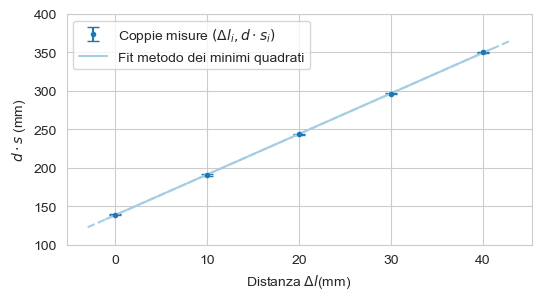

In [176]:
plot_lds(da_s.l, da_s, da_s_Dlt, fit_w, 'all')

In [133]:
f_scala = fit_w[2]

f_scala

5.26706120962046

In [134]:
f_sig_scala = fit_w[3]

f_sig_scala

0.0008989592716125207

In [135]:
f_Dlt_scala = 3 * fit_w[3]

f_Dlt_scala

0.0026968778148375623

## Scala no fit

In [250]:
da_fi = (d * (da_s-da_s.values[0]) / da_s.l)[1:]

In [251]:
da_fi

<xarray.DataArray (l: 4)>
array([5.16      , 5.221     , 5.23666667, 5.2755    ])
Coordinates:
  * l        (l) float64 10.0 20.0 30.0 40.0

In [254]:
da_fi_Dlt = (d*(da_s_Dlt+da_s_Dlt.values[0]))/(da_s-da_s.values[0]) + (d*(da_s-da_s.values[0]))/((da_s-da_s.values[0])**2)

In [255]:
da_fi_Dlt

<xarray.DataArray 's' (l: 5)>
array([       nan, 0.68564785, 0.30105729, 0.22669816, 0.16361606])
Coordinates:
  * l        (l) float64 0.0 10.0 20.0 30.0 40.0

In [256]:
da_fi_sig = da_fi_Dlt / 3

In [257]:
da_fi_w = da_fi_sig ** (-2)

In [262]:
f_scala = (da_fi * da_fi_w).sum() / da_fi_w.sum()

In [263]:
f_scala

<xarray.DataArray ()>
array(5.25259671)

In [264]:
f_sig_scala = da_fi_w.sum() ** (-.5)

In [265]:
f_sig_scala

<xarray.DataArray 's' ()>
array(0.03984848)

In [266]:
f_Dlt_scala = f_sig_scala * 3

In [267]:
f_Dlt_scala

<xarray.DataArray 's' ()>
array(0.11954544)

## Confronto

In [269]:
def plot_fs(MAN, Fs, ERRs, NAMEs):
    plt.figure(figsize=graph_default_size)
    
    plt.plot([-10,10],[MAN,MAN], '--', color='grey', label='Collimazione')
    
    clrs = iter([palette[x] for x in [1,5,3]])
    
    for n,f in enumerate(Fs):
        plt.errorbar([n], [f], yerr=[ERRs[n]], fmt='o', capsize=4, color=next(clrs), label=NAMEs[n])
    
    plt.xticks([0,1],NAMEs)
    
    plt.xlim(-1.5,len(Fs)-.5)
    plt.ylim(4.5,6)
    
    plt.gca().grid(axis='x')
    
    #plt.xlabel('Metodo')
    plt.ylabel('Focale ottenuta (cm)')
    
    plt.legend(loc='center left')
    
    plt.savefig(graph_base_name+'fs', dpi=graph_default_dpi, bbox_inches='tight')

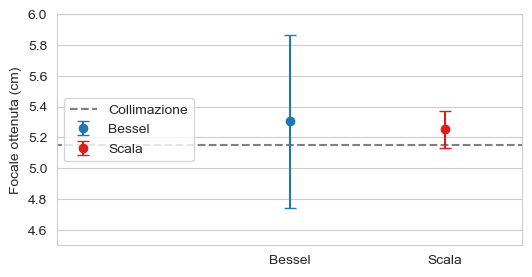

In [270]:
fs = [f_bessel, f_scala]
errs = [f_Dlt_bessel, f_Dlt_scala]
names = ['Bessel', 'Scala']

plot_fs(mano/10, fs, errs, names)